In [1]:
from run_kinfit import run_kinfit, build_custom_hypo
from draw_funcs import draw_1d_hist, draw_1d_hists, vertices_plot2, draw_2d_hist, draw_scatter
from ROOT import TFile, TCanvas
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
build_custom_hypo('Hypo2PiVertex.cpp',
                 rootlogon_path='/home/hep/packages/kfcmd_tr_ph_v8/share/kfcmd/rootlogon.C')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/isr/isr_noisr_comp/KsKpi_sim_hypo_vertex_fit/Hypo2PiVertex_cpp.so


In [3]:
input_path = "/var/kinfit/data/tr_ph_run068705.root"
output_path = "kinfit_kskpi_run068705.root"

In [4]:
run_kinfit(input_path, output_path=output_path, mfield=1.0,
          rootlogon_path='/home/hep/packages/kfcmd_tr_ph_v8/share/kfcmd/rootlogon.C')
# 21281
# KsK+pi- 10174
# KsK-pi+ 10345
# KsKpi 20519

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0
(TFile &) Name: /var/kinfit/data/tr_ph_run068705.root Title: 
(TrPh &) @0x7f6af6fac000
 [STATUS : 01%]	CPU TIME: 5.710	REAL TIME: 5.712
 [STATUS : 02%]	CPU TIME: 5.730	REAL TIME: 5.727
 [STATUS : 03%]	CPU TIME: 6.450	REAL TIME: 6.444
 [STATUS : 04%]	CPU TIME: 6.040	REAL TIME: 6.047
 [STATUS : 05%]	CPU TIME: 6.090	REAL TIME: 6.098
 [STATUS : 06%]	CPU TIME: 6.190	REAL TIME: 6.179
 [STATUS : 07%]	CPU TIME: 6.860	REAL TIME: 6.862
 [STATUS : 08%]	CPU TIME: 6.430	REAL TIME: 6.435
 [STATUS : 09%]	CPU TIME: 5.920	REAL TIME: 5.925
 [STATUS : 10%]	CPU TIME: 6.380	REAL TIME: 6.369
 [STATUS : 11%]	CPU TIME: 6.750	REAL TIME: 6.756
 [STATUS : 12%]	CPU TIME: 7.040	REAL TIME: 7.033
 [STATUS : 13%]	CPU TIME: 8.100	REAL TIME: 8.099
 [STATUS : 14%]	CPU TIME: 7.790	REAL TIME: 7.795
 [STATUS : 15%]	CPU TIME: 8.070	REAL TIME: 8.052
 [STATUS : 16%]	CPU TIME: 6.510	REAL TIME: 6.513
 [STATUS : 17%]	CPU TIME: 7.620	REAL TIME: 7.604
 [STATUS : 18%]	CPU TIME: 7.220	REAL TIME: 7.229
 [STATUS : 19%]	CPU TIM

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/isr/isr_noisr_comp/KsKpi_sim_hypo_vertex_fit/TrPh_C.so


In [5]:
fl = TFile.Open(output_path, 'read')

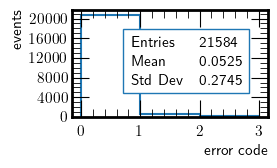

In [6]:
fl.kf_data.Draw("kf_err>>kf_err_kskpi(3,0,3)", "", "goff")
draw_1d_hist("kf_err_kskpi", 
             xlabel='error code',
            ylabel='events',
             fraction=0.47,
             info_coords=(0.3, 0.3),
            h_y=4000, h_x=1)
plt.savefig('kf_err_simhypo_xkpi_noisr.eps')

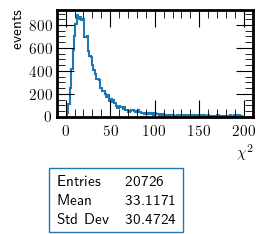

In [7]:
fl.kf_data.Draw("kf_chi2>>kf_chi2_kskpi(128,0,200)", "kf_err==0", "goff")
draw_1d_hist("kf_chi2_kskpi", xlabel=r'$\chi^2$',
             ylabel='events',
            fraction=0.47,
             info_coords=(0.0,-1.0),
            h_y=200, h_x=50)
plt.savefig('kf_chi2_simhypo_xkpi_noisr.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


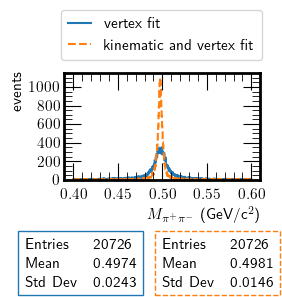

In [8]:
fl.kf_data.Draw("in_mks>>in_mks(512,0.4,0.6)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_mks>>kf_mks(512,0.4,0.6)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx_mks>>kf_vtx_mks(512,0.4,0.6)", "kf_err==0", "goff")
draw_1d_hists([('kf_vtx_mks', 'vertex fit'), 
               ('kf_mks', 'kinematic and vertex fit')], 
              xlabel=r'$M_{\pi^+\pi^-}$ (GeV/c$^2$)',
              ylabel='events',
              fraction=0.47,
             info_coords=(-0.2, -1.0),
            dh=0.0,
             dw=0.7,
             legend_loc='center right',
             bbox_to_anchor=(0.65, 1.1, 0.4, 0.5),
             h_y=200, h_x=0.05)
plt.savefig('kf_mks_simhypo_xkpi_noisr.eps',  bbox_inches='tight')

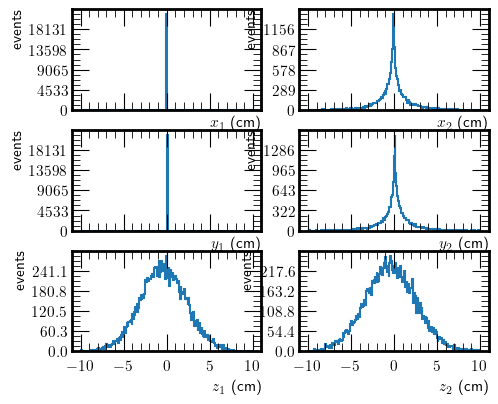

In [9]:
fl.kf_data.Draw("kf_vtx0[0]>>kf_vtx0_x(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx0[1]>>kf_vtx0_y(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx0[2]>>kf_vtx0_z(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[0]>>kf_vtx1_x(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[1]>>kf_vtx1_y(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[2]>>kf_vtx1_z(256, -10, 10)", "", "goff")
vertices_plot2([['kf_vtx0_x', 'kf_vtx1_x'], 
               ['kf_vtx0_y', 'kf_vtx1_y'],
               ['kf_vtx0_z', 'kf_vtx1_z']],
                info_coords=(0.6, 0.6))

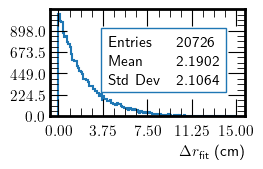

In [10]:
fl.kf_data.Draw("kf_vtx_dr>>kf_vtx_dr(128, 0, 15)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dr", 
             xlabel=r'$\Delta r_{\text{fit}}$ (cm)',
            fraction=0.47,
            info_coords=(0.3, 0.3))
# plt.savefig('kf_vtx_dr_simhypo_xkpi_noisr.eps')

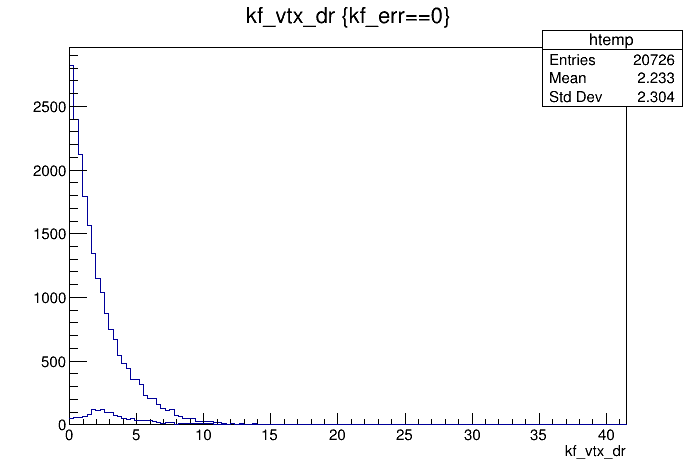

In [11]:
cnv = TCanvas()
fl.kf_data.Draw("kf_vtx_dr", "kf_err==0")
fl.kf_data.Draw("kf_vtx_dr", "kf_err==0 && numiters>6", "same")
cnv.Draw()

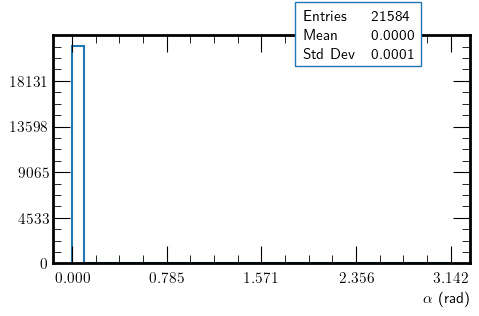

In [12]:
fl.kf_data.Draw("kf_ks_decay_prod_angle>>kf_angle(32, 0, 3.14159)", "", "goff")
draw_1d_hist("kf_angle", xlabel=r'$\alpha$ (rad)')
plt.savefig('kf_ks_prod_angle_kskpi_noisr.eps')

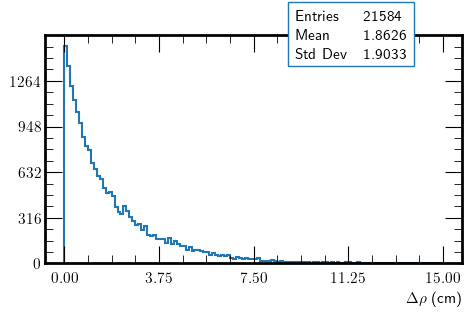

In [13]:
fl.kf_data.Draw("kf_vtx_drho>>kf_vtx_drho(128, 0, 15)", "", "goff")
draw_1d_hist("kf_vtx_drho", xlabel=r'$\Delta\rho$ (cm)')
plt.savefig('kf_vtx_drho_kskpi_noisr.eps')

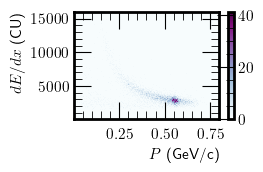

In [14]:
fl.kf_data.Draw("kf_dedx_vtx0_K:kf_p_vtx0_K>>pdedx_K(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_K', xlabel=r'$P$ (GeV/c)', 
             ylabel=r'$dE/dx\text{ (CU)}$',
            fraction=0.47)
plt.savefig('kf_dedx_p_K_from_vtx0_simhypo_xkpi_noisr.eps')

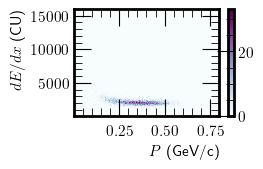

In [15]:
fl.kf_data.Draw("kf_dedx_vtx0_pi:kf_p_vtx0_pi>>pdedx_vtx0_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_vtx0_pi', xlabel=r'$P$ (GeV/c)', 
             ylabel=r'$dE/dx\text{ (CU)}$',
            fraction=0.47)
plt.savefig('kf_dedx_p_pi_from_vtx0_simhypo_xkpi_noisr.eps')

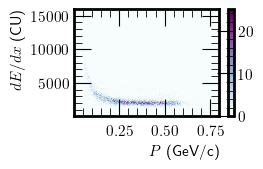

In [16]:
fl.kf_data.Draw("kf_dedx_vtx1_pi[0]:kf_p_vtx1_pi[0]>>pdedx_vtx1_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_dedx_vtx1_pi[1]:kf_p_vtx1_pi[1]>>+pdedx_vtx1_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_vtx1_pi', xlabel=r'$P$ (GeV/c)', 
             ylabel=r'$dE/dx\text{ (CU)}$',
            fraction=0.47)
plt.savefig('kf_dedx_p_pi_from_vtx1_simhypo_xkpi_noisr.eps')

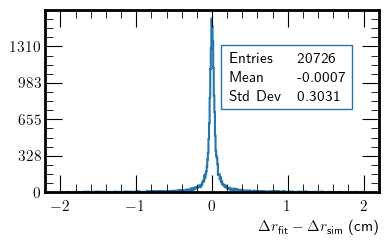

In [17]:
fl.kf_data.Draw("(kf_vtx_dr-sim_vtx_dr)>>kf_delta_dr(512, -2, 2)", "kf_err==0", "goff")
draw_1d_hist("kf_delta_dr", 
             xlabel=r'$\Delta r_{\text{fit}}-\Delta r_{\text{sim}}$ (cm)',
            fraction=0.8,
            info_coords=(0.55, 0.5))
plt.savefig('kf_sim_vs_kf_dr_1d_xkpi_noisr.eps')

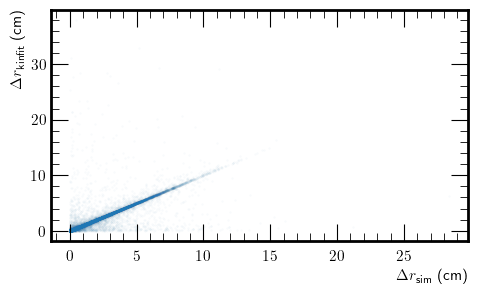

In [18]:
fl.kf_data.Draw(">>elist", "kf_err==0", "entryList")
draw_scatter('kf_data', 'elist', 'sim_vtx_dr', 'kf_vtx_dr', xlabel=r'$\Delta r_{\text{sim}}$ (cm)', ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)')
plt.savefig('kf_sim_vs_kf_dr_noisr.eps')

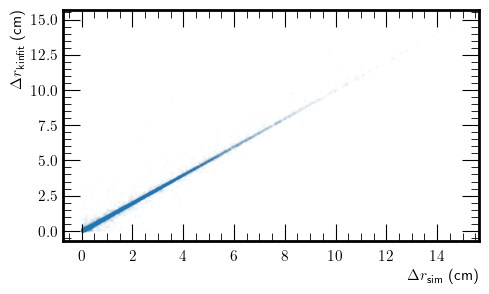

In [19]:
fl.kf_data.Draw(">>elist", "kf_err==0 && kf_chi2<100", "entryList")
draw_scatter('kf_data', 'elist', 'sim_vtx_dr', 'kf_vtx_dr', xlabel=r'$\Delta r_{\text{sim}}$ (cm)', ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)')
plt.savefig('kf_sim_vs_kf_dr_chi2_100_noisr.eps')

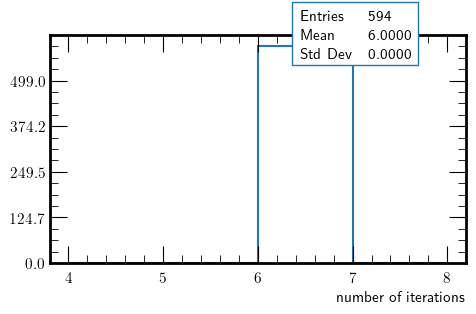

In [20]:
fl.kf_data.Draw("numiters>>numiters", "kf_err==0 && numiters==6", "goff")
draw_1d_hist("numiters", xlabel=r'number of iterations')

In [21]:
i2 = 2384 / 20519
i3 = 11030 / 20519
i4 = 3996 / 20519
i5 = 1231 / 20519
i6 = 543 / 20519
print(i2 + i3 + i4 + i5 + i6)

0.934938349822116


In [22]:
# fl.Close()